# Proyecto

## Importación de Gatos

In [734]:
# importar datos a un dataframe de master.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el archivo master.csv
df = pd.read_csv('master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [735]:
"""
from ydata_profiling import ProfileReport
profile = ProfileReport(df)
profile
profile.to_file("profiler.html")
"""

'\nfrom ydata_profiling import ProfileReport\nprofile = ProfileReport(df)\nprofile\nprofile.to_file("profiler.html")\n'

In [736]:
# Debemos cambiar el nombre de ' gdp_for_year ($) ' a 'gdp_for_year' y 'gdp_per_capita ($)' a 'gdp_per_capita'
df.rename(columns={' gdp_for_year ($) ':'gdp_for_year', 'gdp_per_capita ($)':'gdp_per_capita'}, inplace=True)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


## Explore los datos para encontrar preguntas interesantes y líneas de investigación.

### a) Comience describiendo cuántas variables y observaciones tiene disponibles, y el tipo de cada una de las variables

In [737]:
# cuantas variables hay?
print(f"hay {len(df.columns)} y son las siguientes:")

list_columns = list(df.columns)
for each in list_columns:
    print(f"{each}  \t\t: {df[each].dtype}")


# crea un df llamado df_vars con las variables del df y un ejemplo de cada una
df_vars = pd.DataFrame()
for each in list_columns:
    df_vars[each] = [df[each].iloc[100]]

print(f"El df_vars tiene {len(df_vars.columns)} columnas y son las siguientes:")
df_vars.head()

hay 12 y son las siguientes:
country  		: object
year  		: int64
sex  		: object
age  		: object
suicides_no  		: int64
population  		: int64
suicides/100k pop  		: float64
country-year  		: object
HDI for year  		: float64
gdp_for_year  		: object
gdp_per_capita  		: int64
generation  		: object
El df_vars tiene 12 columnas y son las siguientes:


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1997,female,15-24 years,21,294000,7.14,Albania1997,NaN,"2,359,903,108",793,Generation X


En el conjunto de datos podemos encontrar 12 variables distintas, de las cuales 3 de tipo texto, 6 de tipo númerico, y 3 de tipo categórico. En el conjunto de datos se encontro que hay un total de 19456 de celdas vacias, lo que representa un 5.8% del total de datos, donde la columna HDI_for_year contiene la totalidad de estas celdas vacías, representando el 69.9% de los datos en dicha columna, por lo que no es viable eliminar las filas que no posean dicho dato, por esto se deberá evaluar un acercamiento correcto a este problema. Las columnas de número de suicidios y número de suicidios por cada 100k de población poseen ceros, sin embargo esto no es un problema ya que por la naturaleza de estas columnas es normal y factible que contengan datos de esta índole. La columna de sexo está uniformemente distribuida, por lo que se cuenta con la misma cantidad de datos tanto para hombres como para mujeres, lo cual es bastante bueno para un análisis sin sesgos. En cuanto a las edades que se encuentran en los datos, ya que se encuentran en una variable de tipo categórico, se cuenta con los intervalos de:
- 15-24
- 25-34
- 35-54
- 55-74
- 75 +

Estos rangos se cambiaran a variables de tipo númerico para poder separar cada uno de los rangos por columnas distintas. Lo mismo se hará para la variable sexo y para la generación, siendo esta ultima dividida en las categorías de:
- Generation X
- Silent
- Millenials
- Boomers
- G.I. Generation




| Variable          | Tipo de Variable       |
|-------------------|------------------------|
| country           | Cualitativa Nominal    |
| year              | Cuantitativa Discreta  |
| sex               | Cualitativa Nominal    |
| age               | Cualitativa Ordinal    |
| suicides_no       | Cuantitativa Discreta  |
| population        | Cuantitativa Discreta  |
| suicides/100k pop | Cuantitativa Continua  |
| country-year      | Cualitativa Nominal    |
| HDI for year      | Cuantitativa Continua  |
| gdp_for_year      | Cuantitativa Continua  |
| gdp_per_capita    | Cuantitativa Continua  |
| generation        | Cualitativa Ordinal    |


In [738]:
# Convertir gdp_for_year a float
df['gdp_for_year'] = df['gdp_for_year'].str.replace(',', '').astype(float)

# convertir gdp_per_capita a float
df['gdp_per_capita'] = df['gdp_per_capita'].astype(float)

In [739]:
# en la columna age, debemos eliminar en todas las columnas ' years'. 
df['age'] = df['age'].str.replace(' years', '')
df.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24,21,312900,6.71,Albania1987,NaN,2.156625e+09,796.0,Generation X
1,Albania,1987,male,35-54,16,308000,5.19,Albania1987,NaN,2.156625e+09,796.0,Silent
2,Albania,1987,female,15-24,14,289700,4.83,Albania1987,NaN,2.156625e+09,796.0,Generation X
3,Albania,1987,male,75+,1,21800,4.59,Albania1987,NaN,2.156625e+09,796.0,G.I. Generation
4,Albania,1987,male,25-34,9,274300,3.28,Albania1987,NaN,2.156625e+09,796.0,Boomers


In [740]:
# age dummies
age_dummies = pd.get_dummies(df['age'], prefix='age')
df = pd.concat([df, age_dummies], axis=1)
df.drop('age', axis=1, inplace=True)
df.head()

,country,year,sex,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation,age_15-24,age_25-34,age_35-54,age_5-14,age_55-74,age_75+
0,Albania,1987,male,21,312900,6.71,Albania1987,NaN,2.156625e+09,796.0,Generation X,True,False,False,False,False,False
1,Albania,1987,male,16,308000,5.19,Albania1987,NaN,2.156625e+09,796.0,Silent,False,False,True,False,False,False
2,Albania,1987,female,14,289700,4.83,Albania1987,NaN,2.156625e+09,796.0,Generation X,True,False,False,False,False,False
3,Albania,1987,male,1,21800,4.59,Albania1987,NaN,2.156625e+09,796.0,G.I. Generation,False,False,False,False,False,True
4,Albania,1987,male,9,274300,3.28,Albania1987,NaN,2.156625e+09,796.0,Boomers,False,True,False,False,False,False


In [741]:
# generation dummies
generation_dummies = pd.get_dummies(df['generation'], prefix='generation')
df = pd.concat([df, generation_dummies], axis=1)
df.drop('generation', axis=1, inplace=True)
df.head()

,country,year,sex,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,...,age_35-54,age_5-14,age_55-74,age_75+,generation_Boomers,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,Albania,1987,male,21,312900,6.71,Albania1987,NaN,2.156625e+09,796.0,...,False,False,False,False,False,False,True,False,False,False
1,Albania,1987,male,16,308000,5.19,Albania1987,NaN,2.156625e+09,796.0,...,True,False,False,False,False,False,False,False,False,True
2,Albania,1987,female,14,289700,4.83,Albania1987,NaN,2.156625e+09,796.0,...,False,False,False,False,False,False,True,False,False,False
3,Albania,1987,male,1,21800,4.59,Albania1987,NaN,2.156625e+09,796.0,...,False,False,False,True,False,True,False,False,False,False
4,Albania,1987,male,9,274300,3.28,Albania1987,NaN,2.156625e+09,796.0,...,False,False,False,False,True,False,False,False,False,False


In [742]:
# sex dummies
sex_dummies = pd.get_dummies(df['sex'], prefix='sex', drop_first=True)
df = pd.concat([df, sex_dummies], axis=1)
df.drop('sex', axis=1, inplace=True)
df.head()



,country,year,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,age_15-24,...,age_5-14,age_55-74,age_75+,generation_Boomers,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent,sex_male
0,Albania,1987,21,312900,6.71,Albania1987,NaN,2.156625e+09,796.0,True,...,False,False,False,False,False,True,False,False,False,True
1,Albania,1987,16,308000,5.19,Albania1987,NaN,2.156625e+09,796.0,False,...,False,False,False,False,False,False,False,False,True,True
2,Albania,1987,14,289700,4.83,Albania1987,NaN,2.156625e+09,796.0,True,...,False,False,False,False,False,True,False,False,False,False
3,Albania,1987,1,21800,4.59,Albania1987,NaN,2.156625e+09,796.0,False,...,False,False,True,False,True,False,False,False,False,True
4,Albania,1987,9,274300,3.28,Albania1987,NaN,2.156625e+09,796.0,False,...,False,False,False,True,False,False,False,False,False,True


In [743]:
# country dummies
country_dummies = pd.get_dummies(df['country'], prefix='country')
df = pd.concat([df, country_dummies], axis=1)
df.head()

,country,year,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,age_15-24,...,country_Thailand,country_Trinidad and Tobago,country_Turkey,country_Turkmenistan,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan
0,Albania,1987,21,312900,6.71,Albania1987,NaN,2.156625e+09,796.0,True,...,False,False,False,False,False,False,False,False,False,False
1,Albania,1987,16,308000,5.19,Albania1987,NaN,2.156625e+09,796.0,False,...,False,False,False,False,False,False,False,False,False,False
2,Albania,1987,14,289700,4.83,Albania1987,NaN,2.156625e+09,796.0,True,...,False,False,False,False,False,False,False,False,False,False
3,Albania,1987,1,21800,4.59,Albania1987,NaN,2.156625e+09,796.0,False,...,False,False,False,False,False,False,False,False,False,False
4,Albania,1987,9,274300,3.28,Albania1987,NaN,2.156625e+09,796.0,False,...,False,False,False,False,False,False,False,False,False,False


### Datos faltantes de HDI por año
Debido a la cantidad de datos vacios, y la naturaleza de estos, no es posible "invetarse" los datos faltantes, por lo que se procederá a eliminar la columna.

In [744]:
# Eliminamos la columna HDI for year del df debido a que tiene muchos valores vacios (69%)
df.drop('HDI for year', axis=1, inplace=True)

### Datos innecesarios country-year
Eliminamos la columna country-year debido a que no le ecnontramos una utilidad a dichos datos

In [745]:
# Eliminamos la columna country-year del df
df.drop('country-year', axis=1, inplace=True)

In [746]:
print("ola pero ola de saludo no ola de mar")

ola pero ola de saludo no ola de mar


In [747]:
# NADA MAS PARA DEBUG NO ME LO QUITEN O LES PEGO

# Obten la lista de columnas
list_columns = list(df.columns)
print(f"El df tiene {len(list_columns)} columnas y son las siguientes:")
print(list_columns)

El df tiene 121 columnas y son las siguientes:
['country', 'year', 'suicides_no', 'population', 'suicides/100k pop', 'gdp_for_year', 'gdp_per_capita', 'age_15-24', 'age_25-34', 'age_35-54', 'age_5-14', 'age_55-74', 'age_75+', 'generation_Boomers', 'generation_G.I. Generation', 'generation_Generation X', 'generation_Generation Z', 'generation_Millenials', 'generation_Silent', 'sex_male', 'country_Albania', 'country_Antigua and Barbuda', 'country_Argentina', 'country_Armenia', 'country_Aruba', 'country_Australia', 'country_Austria', 'country_Azerbaijan', 'country_Bahamas', 'country_Bahrain', 'country_Barbados', 'country_Belarus', 'country_Belgium', 'country_Belize', 'country_Bosnia and Herzegovina', 'country_Brazil', 'country_Bulgaria', 'country_Cabo Verde', 'country_Canada', 'country_Chile', 'country_Colombia', 'country_Costa Rica', 'country_Croatia', 'country_Cuba', 'country_Cyprus', 'country_Czech Republic', 'country_Denmark', 'country_Dominica', 'country_Ecuador', 'country_El Salvado

### b) Haga un resumen de las variables numéricas e investigue si siguen una distribución normal y tablas de frecuencia para las variables categóricas, escriba lo que vaya encontrando.

| Variable numericas                   | Tipo de Variable       |
|-----------------------------|------------------------|
| year                        | Cuantitativa Discreta |
| suicides_no                 | Cuantitativa Discreta |
| population                  | Cuantitativa Discreta |
| suicides/100k pop           | Cuantitativa Continua |
| gdp_for_year                | Cuantitativa Continua |
| gdp_per_capita                | Cuantitativa Continua |


#### Tablas de frecuencia de las variables categóricasuméricas

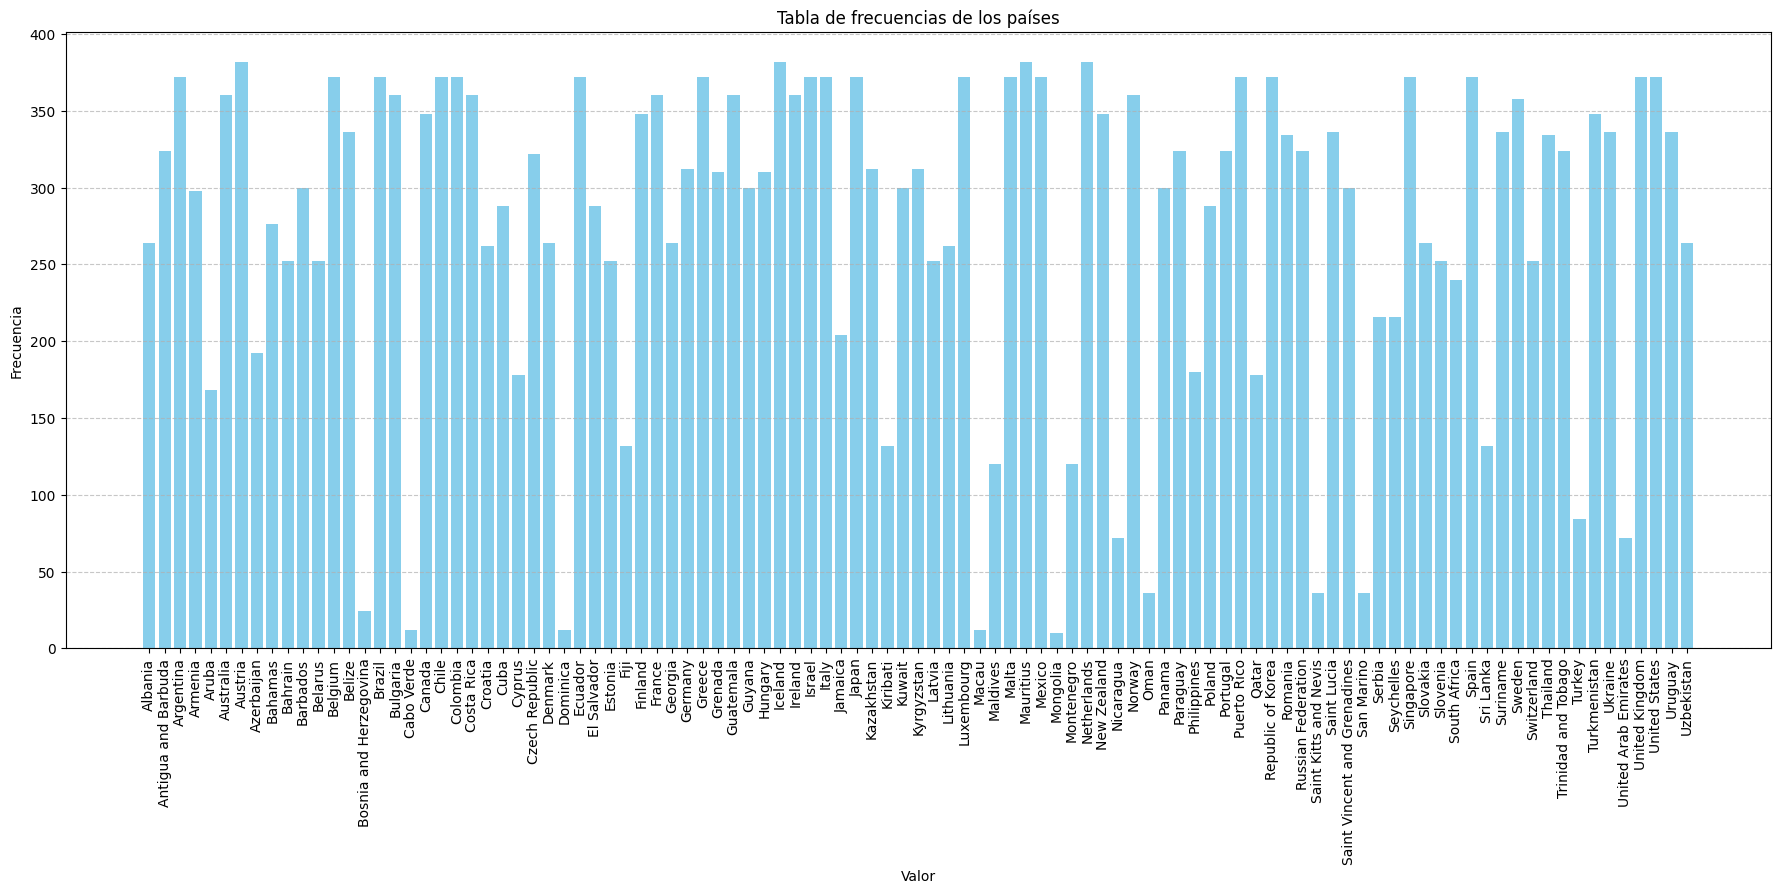

In [748]:
pais = df["country"]
tabla = pais.value_counts().reset_index()
tabla.columns = ["Valor", "Frecuencia"]
tabla = tabla.sort_values(by="Valor")
tabla = tabla.reset_index(drop=True)
plt.figure(figsize=(22, 8))
plt.bar(tabla["Valor"], tabla["Frecuencia"], color='skyblue')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Tabla de frecuencias de los países')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [749]:
df.drop('country', axis=1, inplace=True)

### c) Cruce las variables que considere que son las más importantes para hallar los elementos clave que lo pueden llevar a comprender lo que está causando el problema encontrado

### d) Haga gráficos exploratorios que le dé ideas del estado de los datos

In [750]:
# pega el dataframe a un archivo csv
df.to_csv('master_clean.csv', index=False)
print("Archivo guardado como master_clean.csv")

Archivo guardado como master_clean.csv


### e) Haga un agrupamiento (clustering) e interprete los resultados

C:\Users\aleaz\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aleaz\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aleaz\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aleaz\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

[5.878104601437386e+28, 1.947759668357571e+28, 7.301216961239792e+27, 3.9478566138225066e+27, 2.613578301989959e+27, 1.7606157252298487e+27, 1.335690645563242e+27, 1.0130103152241406e+27, 8.001172941713536e+26, 6.62954079203723e+26]
El k óptimo es: 10


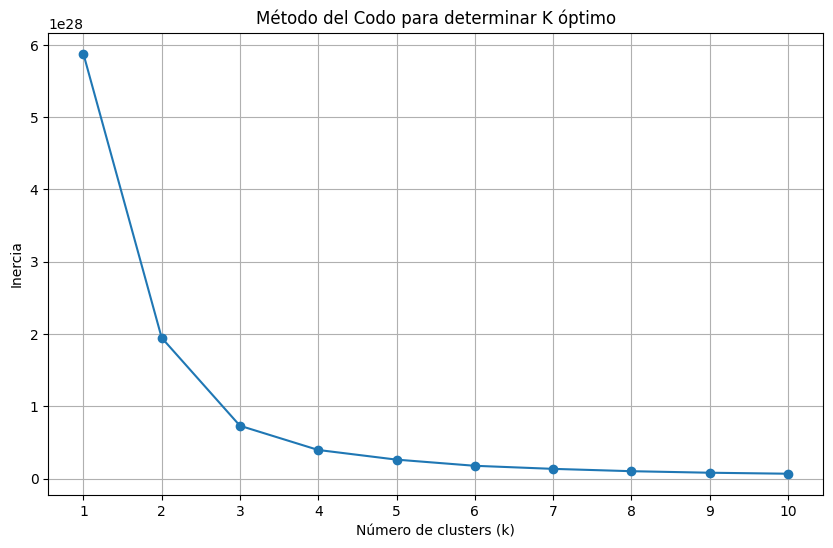

In [751]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determinar la inercia para diferentes valores de 'k'
inercias = []
rango_k = range(1, 11)

for k in rango_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inercias.append(kmeans.inertia_)

# imprime el valor de inercia
print(inercias)

# imprime el k optimo
print(f"El k óptimo es: {inercias.index(min(inercias)) + 1}")

# Visualizar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(rango_k, inercias, marker='o')
plt.title('Método del Codo para determinar K óptimo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.xticks(rango_k)
plt.grid(True)
plt.show()

Encontramos que el k adecuado es 7, porque casi no se experimenta un cambio en la pendiente y su complejidad computacional es aceptable. 

In [752]:
# Entrenar el modelo K-means con K=7
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X)

# Agregar las etiquetas de cluster al DataFrame original para análisis
df['Cluster'] = kmeans.labels_

df.head()

C:\Users\aleaz\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,year,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,age_15-24,age_25-34,age_35-54,age_5-14,...,country_Trinidad and Tobago,country_Turkey,country_Turkmenistan,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,Cluster
0,1987,21,312900,6.71,2.156625e+09,796.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,0
1,1987,16,308000,5.19,2.156625e+09,796.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,0
2,1987,14,289700,4.83,2.156625e+09,796.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,0
3,1987,1,21800,4.59,2.156625e+09,796.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
4,1987,9,274300,3.28,2.156625e+09,796.0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,0


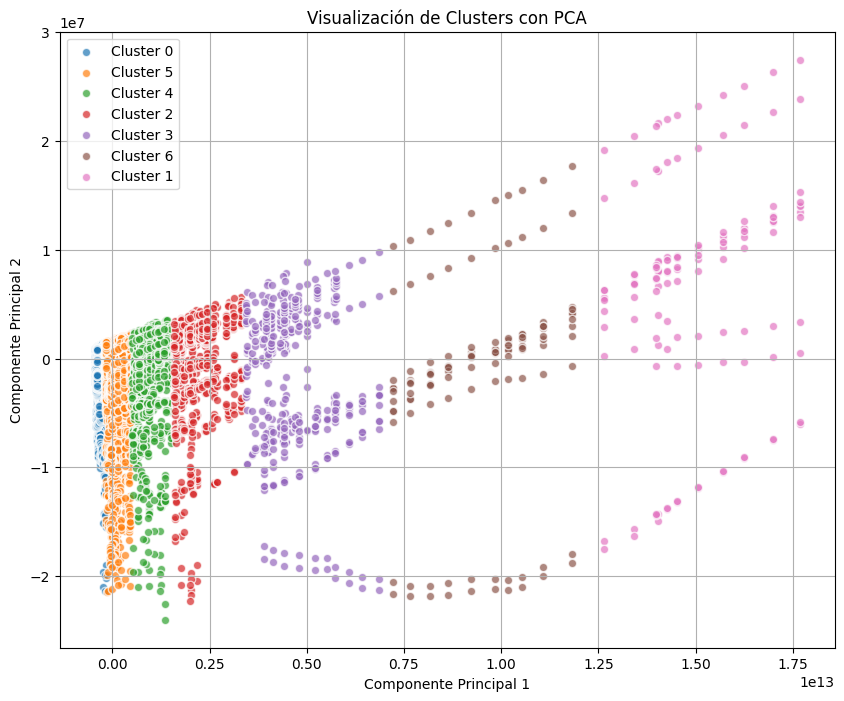

In [753]:
from sklearn.decomposition import PCA

# Aplicar PCA para reducir a 2 dimensiones para visualización
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Crear un DataFrame con los resultados de PCA
df_pca = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])
df_pca['Cluster'] = kmeans.labels_

# Visualizar los clusters en 2D
plt.figure(figsize=(10, 8))
for cluster in df_pca['Cluster'].unique():
    cluster_data = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', alpha=0.7, edgecolors='w')

plt.title('Visualización de Clusters con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()

In [754]:
len(df.columns)

121

C:\Users\aleaz\AppData\Local\Temp\ipykernel_17132\2574718326.py:35: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(*centroid, color=color, s=200, edgecolor='k', marker='x')
C:\Users\aleaz\AppData\Local\Temp\ipykernel_17132\2574718326.py:35: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(*centroid, color=color, s=200, edgecolor='k', marker='x')
C:\Users\aleaz\AppData\Local\Temp\ipykernel_17132\2574718326.py:35: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(*centroid, color=color, s=200, edgecolor='k', marker='x')
C:\Users\alea

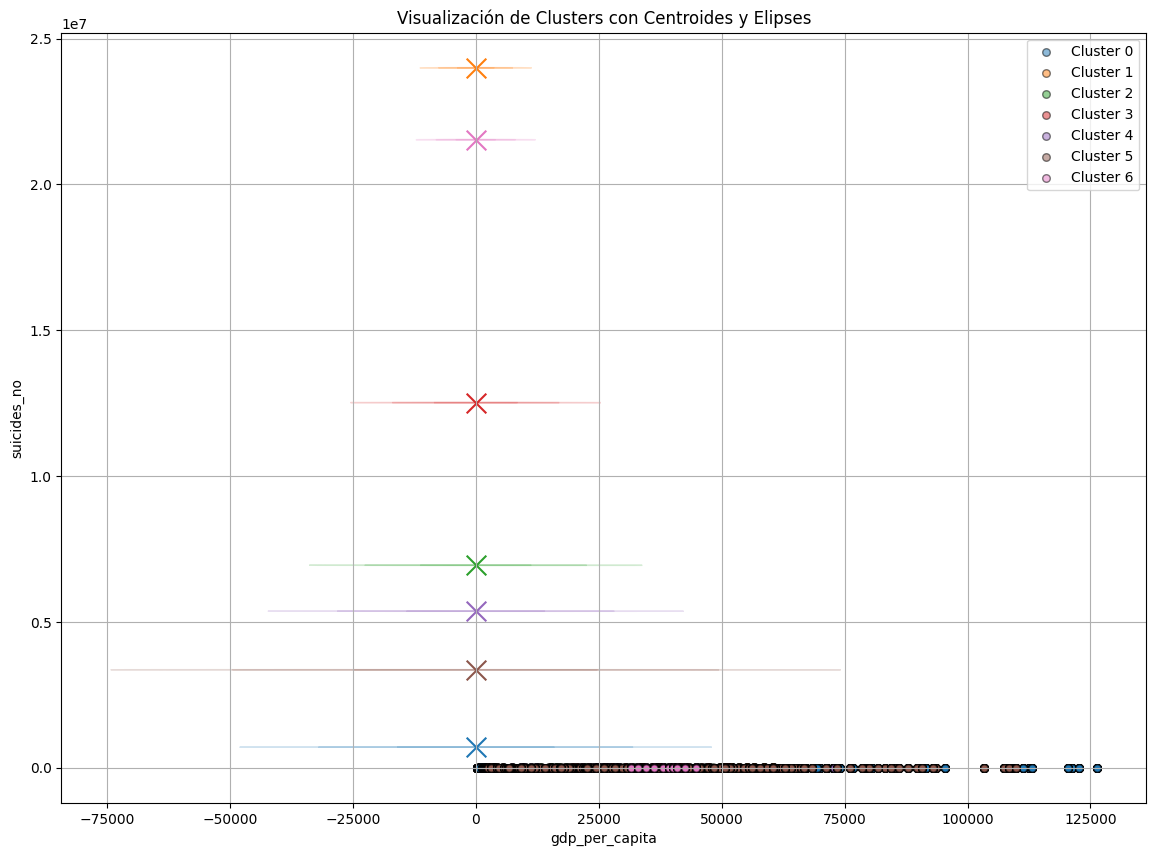

In [756]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np

colors = plt.cm.tab10(np.arange(len(np.unique(kmeans.labels_)), dtype=int))

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Dibuja una elipse con una posición y covarianza dadas."""
    ax = ax or plt.gca()
    
    # Convertir la covarianza a componentes principales
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width = height = 2 * np.sqrt(covariance)
    
    # Dibujar la elipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, width=nsig * width, height=nsig * height, angle=angle, **kwargs))

# Suponiendo que 'colors', 'df', y 'kmeans' ya están definidos
x_var_full = 'gdp_per_capita'
y_var_full = 'suicides_no'

plt.figure(figsize=(14, 10))

for i, color in enumerate(colors):
    in_cluster = kmeans.labels_ == i
    points = df.loc[in_cluster, [x_var_full, y_var_full]].values
    centroid = kmeans.cluster_centers_[i, [df.columns.get_loc(x_var_full), df.columns.get_loc(y_var_full)]]
    plt.scatter(points[:, 0], points[:, 1], s=30, color=color, alpha=0.5, edgecolor='k', label=f'Cluster {i}')
    plt.scatter(*centroid, color=color, s=200, edgecolor='k', marker='x')
    
    if len(points) > 1:  # Solo dibujar elipses para clusters con más de 1 punto
        draw_ellipse(centroid, np.cov(points, rowvar=False), alpha=0.2, color=color)

plt.xlabel(x_var_full)
plt.ylabel(y_var_full)
plt.title('Visualización de Clusters con Centroides y Elipses')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from kneed import KneeLocator

In [ ]:
X = df.drop('suicides_no', axis=1)
y = df['suicides_no']

In [ ]:
X.head()

,year,population,suicides/100k pop,gdp_for_year,gdp_per_capita,age_15-24,age_25-34,age_35-54,age_5-14,age_55-74,...,country_Trinidad and Tobago,country_Turkey,country_Turkmenistan,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,Cluster
0,1987,312900,6.71,2.156625e+09,796.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
1,1987,308000,5.19,2.156625e+09,796.0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,0
2,1987,289700,4.83,2.156625e+09,796.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
3,1987,21800,4.59,2.156625e+09,796.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
4,1987,274300,3.28,2.156625e+09,796.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,0


In [ ]:
y.head()

0    21
1    16
2    14
3     1
4     9
Name: suicides_no, dtype: int64

In [ ]:
# escalado de datos
escalador = StandardScaler()
X = escalador.fit_transform(X)

X[:5]

array([[-1.68361541, -0.39161747, -0.32203168, -0.30505591, -0.8508637 ,
         2.23452599, -0.4475222 , -0.4475222 , -0.44566948, -0.4475222 ,
        -0.4475222 , -0.4675169 , -0.33079804,  1.82796285, -0.23619373,
        -0.51568058, -0.54461639,  1.        , 10.21659375, -0.10855198,
        -0.11641692, -0.10405624, -0.07794556, -0.11449881, -0.11799279,
        -0.08336349, -0.1001016 , -0.09560875, -0.10440863, -0.09560875,
        -0.11641692, -0.11056805, -0.02938424, -0.11641692, -0.11449881,
        -0.02077331, -0.11254974, -0.11641692, -0.11641692, -0.11449881,
        -0.09750498, -0.10227685, -0.08024635, -0.10821249, -0.09787998,
        -0.02077331, -0.11641692, -0.10227685, -0.09560875, -0.06904642,
        -0.11254974, -0.11449881, -0.09787998, -0.10649955, -0.11641692,
        -0.1061538 , -0.11449881, -0.10440863, -0.1061538 , -0.11799279,
        -0.11449881, -0.11641692, -0.11641692, -0.08594779, -0.11641692,
        -0.10649955, -0.06904642, -0.10440863, -0.1

In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# Creamos una lista para almacenar los valores de WCSS
wcss = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [ ]:
# Entrenamos kmeans. 
kmeans.fit(X)

KMeans(init='random', n_clusters=19, n_init=10, random_state=42)

In [ ]:
# las ubicaciones finales de los centroides
kmeans.cluster_centers_

array([[-0.08072623,  1.33470302,  0.36893124, ..., -0.11056805,
        -0.09787998,  0.98869333],
       [-0.60354283,  0.02773389,  0.06908826, ...,  0.02992597,
         0.01445587, -0.17390458],
       [ 0.35211026, -0.16979904, -0.11543151, ..., -0.11056805,
        -0.09787998,  1.35818138],
       ...,
       [-1.09433987, -0.34923002,  0.50035137, ...,  0.04727284,
         0.00882147, -0.2173374 ],
       [ 0.03100553,  0.74139393, -0.30284181, ..., -0.11056805,
        -0.09787998,  0.30742453],
       [ 0.26468892, -0.24810698,  0.44332449, ..., -0.11056805,
        -0.09787998, -0.53272805]])

In [ ]:
# El número de iteraciones que fueron necesarias para converger en esa corrida
kmeans.n_iter_

31

In [ ]:
# Visualización de la lista wcss
wcss

[3338399.9999999967,
 3272381.042674488,
 3218339.4212591527,
 3168377.9433782916,
 3132551.7191620935,
 3093036.4189694235,
 3071710.175084153,
 3032921.6209636005,
 3014813.5056346813,
 2974183.3399904245,
 2945317.891411387,
 2921261.660441333,
 2895091.3977507413,
 2867408.886190043,
 2845698.44789168,
 2817197.5297399424,
 2791249.048161384,
 2765677.1643796833,
 2744631.9171238965]

In [ ]:
# visualización de la lista wcss en dataframe. 
datos_WCSS = pd.DataFrame(range(1, 20), columns = ["K"])
datos_WCSS["WCSS"] = wcss
datos_WCSS.head(20)

,K,WCSS
0,1,3.338400e+06
1,2,3.272381e+06
2,3,3.218339e+06
3,4,3.168378e+06
4,5,3.132552e+06
5,6,3.093036e+06
6,7,3.071710e+06
7,8,3.032922e+06
8,9,3.014814e+06
9,10,2.974183e+06


In [ ]:
localizador_codo = KneeLocator(range(1, 20), 
                               wcss, 
                               curve="convex", 
                               direction="decreasing"
                              )

localizador_codo.elbow

10

In [ ]:
# con df, usa un modelo de machine learning que permita clustering. Usa un modelo que permita aprendizaje supervisado. 

# Importar librerias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix, classification_report

# Definir X y y
X = df.drop('suicides_no', axis=1)
y = df['suicides_no']

# Dividir el dataset en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Entrenar el modelo
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

# Predecir el conjunto de prueba
y_pred = kmeans.predict(X_test)



C:\Users\aleaz\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# Evaluar el modelo
print(f"Silhouette Score: {silhouette_score(X_test, y_pred)}")

Silhouette Score: 0.8869487463109196
